In [ ]:
ls

drive/  sample_data/  Test/  Train/  training_images/  validation_images/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
labels = pd.read_csv('drive/MyDrive/cnn//labels.csv')
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
!unzip drive/MyDrive/cnn/train.zip -d Train/
!unzip drive/MyDrive/cnn/test.zip -d Test/

Streaming output truncated to the last 5000 lines.
  inflating: Test/test/82ddade069436304c8b98fe2b3c4f5ec.jpg  
  inflating: Test/test/82e41a906dbd9ec362a3d49cf6bbe645.jpg  
  inflating: Test/test/82e5e34cc18b267ef7057cc92de8b44b.jpg  
  inflating: Test/test/82e64f28df4fff22beb11e9a1e413212.jpg  
  inflating: Test/test/82ec6bdf968a14923340179515ce5546.jpg  
  inflating: Test/test/82ee3ee4dc01b33203a049c6c3338034.jpg  
  inflating: Test/test/82f07a63a1f03ff9d8e0f4a8458caa93.jpg  
  inflating: Test/test/82f5fb0bdaff30a4a3374e2d9915856c.jpg  
  inflating: Test/test/82fbff1bd375474e3d4ec5cbfde3f9f0.jpg  
  inflating: Test/test/8301c772feb7f4068473f0157ae58f9b.jpg  
  inflating: Test/test/8307be57a9d76c1584e16801a39cb1dc.jpg  
  inflating: Test/test/831a38bd2cfa0a093967d5b6c1ac09dc.jpg  
  inflating: Test/test/831ef824af939f9754e3593638933b64.jpg  
  inflating: Test/test/8322f53b29325419ef3bcf7cf10d7172.jpg  
  inflating: Test/test/83233e2774e116ef34a04c53dd00a282.jpg  
  inflating: Test/t

In [ ]:
labels = pd.read_csv('drive/MyDrive/cnn//labels.csv')

In [ ]:
labels_dict = {i:j for i,j in zip(labels['id'],labels['breed'])}
classes = set(labels_dict.values())
images = [f for f in os.listdir('Train/train')]
images

['680a84b9565cf178d95cc02b6f66969e.jpg',
 '66cc0caf5507a65f1bf5a339a4e285cb.jpg',
 '8810923d4134c41b7ca0e8543c31ffeb.jpg',
 '91baafad0bfabce8819dd375963677d3.jpg',
 'daef9ef628860dee42415373fa2357a3.jpg',
 'dbd006d2d983a1b52238dc293d5139c0.jpg',
 '15190d69d724d7e94ef64a347b959ccb.jpg',
 'f0216b542b2feaf7fea3412ce949536e.jpg',
 '7408e8f78e6b1e7372010d145c7f7684.jpg',
 '9d267017b07f6eac408bad624f205484.jpg',
 '024fd994941146f8dfdb38a9b2b74efd.jpg',
 '9fc3f540a8973e5d4a212b0a2b5ffa6b.jpg',
 '1ec644acf1ed5209697c163919207d3e.jpg',
 '9c5ab09758f935bc9e3d5670d1f14cd6.jpg',
 '6d70ba62b2f3f73a28d77d519d3f477b.jpg',
 'f19b045bcf373d6fcf05c80247850d50.jpg',
 'f69495e6688f3e331ecddb474367e923.jpg',
 'af39c8e69b35029608e2c600e40fc515.jpg',
 '924d9891d144fe3df9c06cc281bc5e86.jpg',
 '770e93c5d9961cc0b72dc41069cdaa62.jpg',
 '7019dc9a063a19bd2f7568f80ede854f.jpg',
 '2f7cd312a36c63d9e041c4b1ff173ba6.jpg',
 'e827e6439b32ea68d51e894a7350c699.jpg',
 '59cd819324bb979fe89e1386aaa79b6a.jpg',
 'a5621787bbc921

In [ ]:
if  not os.path.exists('training_images'):
        os.makedirs('training_images')

if  not os.path.exists('validation_images'):
    os.makedirs('validation_images')

In [ ]:
os.chdir('training_images')
for curClass in classes:    
    if  not os.path.exists(curClass):
        os.makedirs(curClass)
        #os.rmdir(curClass)

os.chdir('../validation_images')
for curClass in classes:    
    if  not os.path.exists(curClass):
        os.makedirs(curClass)

In [ ]:
ls

affenpinscher/                   japanese_spaniel/
afghan_hound/                    keeshond/
african_hunting_dog/             kelpie/
airedale/                        kerry_blue_terrier/
american_staffordshire_terrier/  komondor/
appenzeller/                     kuvasz/
australian_terrier/              labrador_retriever/
basenji/                         lakeland_terrier/
basset/                          leonberg/
beagle/                          lhasa/
bedlington_terrier/              malamute/
bernese_mountain_dog/            malinois/
black-and-tan_coonhound/         maltese_dog/
blenheim_spaniel/                mexican_hairless/
bloodhound/                      miniature_pinscher/
bluetick/                        miniature_poodle/
border_collie/                   miniature_schnauzer/
border_terrier/                  newfoundland/
borzoi/                          norfolk_terrier/
boston_bull/                     norwegian_elkhound/
bouvier_des_flandres/            norwich_terrier/


In [ ]:
os.chdir("..")
count = 0 
destination_directory = 'training_images/'
for item in images:
    if count >7999:
        destination_directory = 'validation_images/'
    filekey = os.path.splitext(item)[0]
    if  not os.path.exists(destination_directory+labels_dict[filekey]+'/'+item):
        copyfile('Train/train/'+item, destination_directory+labels_dict[filekey]+'/'+item)
    print(labels_dict[filekey])
    count +=1

Streaming output truncated to the last 5000 lines.
groenendael
mexican_hairless
bouvier_des_flandres
pekinese
miniature_pinscher
tibetan_terrier
standard_poodle
border_collie
dandie_dinmont
maltese_dog
toy_poodle
pembroke
airedale
miniature_poodle
japanese_spaniel
german_short-haired_pointer
blenheim_spaniel
rhodesian_ridgeback
rottweiler
great_pyrenees
walker_hound
pomeranian
bouvier_des_flandres
soft-coated_wheaten_terrier
airedale
mexican_hairless
irish_terrier
sealyham_terrier
yorkshire_terrier
chow
basset
chesapeake_bay_retriever
boxer
weimaraner
pembroke
briard
briard
curly-coated_retriever
miniature_schnauzer
malamute
basenji
curly-coated_retriever
toy_terrier
staffordshire_bullterrier
kerry_blue_terrier
boston_bull
west_highland_white_terrier
silky_terrier
eskimo_dog
cardigan
miniature_poodle
miniature_pinscher
leonberg
lakeland_terrier
pug
pug
walker_hound
bloodhound
schipperke
komondor
norwich_terrier
rhodesian_ridgeback
silky_terrier
basenji
bluetick
collie
border_collie
bas

In [ ]:
ls

drive/  sample_data/  Test/  Train/  training_images/  validation_images/


In [ ]:
if  not os.path.exists('preview'):
        os.makedirs('preview')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=0.3,
        height_shift_range=0.2,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('training_images/afghan_hound/0379145880ad3978f9b80f0dc2c03fba.jpg') 
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='dog_breed', save_format='jpeg'):
    i += 1
    if i > 20:
        break 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Activation, Flatten
from keras.layers import Dense
from keras.layers import Conv2D, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(A
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
#check class_mode in keras documentation https://keras.io/preprocessing/image/
training_set = train_datagen.flow_from_directory(
        'training_images',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'validation_images',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 8000 images belonging to 120 classes.
Found 2222 images belonging to 121 classes.


In [ ]:
from keras.layers import Dropout
from keras.layers import LeakyReLU

# clf = Sequential()

model = Sequential()

# -----------------------------------------------------------------------------
# conv 1
model.add(Conv2D(16, (3,3), input_shape=(150, 150, 3))) 
model.add(BatchNormalization(axis=3))
# model.add(LeakyReLU(alpha=0.1))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

# max pool 1
model.add(MaxPooling2D(pool_size=(2,2),strides=2)) 

# -----------------------------------------------------------------------------
# # conv 2
model.add(Conv2D(32, (3,3)))                                                    
model.add(BatchNormalization(axis=3))
# model.add(LeakyReLU(alpha=0.1))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

# max pool 2
model.add(MaxPooling2D(pool_size=(2,2),strides=2))                              
# -----------------------------------------------------------------------------

# conv 3
model.add(Conv2D(48, (3,3)))                                                       
model.add(BatchNormalization(axis=3))
# model.add(LeakyReLU(alpha=0.1))
model.add(Activation('relu'))
# model.add(Dropout(0.2))

# max pool 3
model.add(MaxPooling2D(pool_size=(2,2),strides=2))                                
# -----------------------------------------------------------------------------

# # conv 4
model.add(Conv2D(64, (3,3)))                                                    
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
#model.add(Dropout(0.7))
# max pool 4
model.add(MaxPooling2D(pool_size=(2,2),strides=2))     



# flatten
model.add(Flatten())                                                           

model.add(Dense(1024, activation='relu'))                                  

# fc layer 2
model.add(Dense(512, activation='relu'))

# fc layer 3
model.add(Dense(256, activation='relu'))

# fc layer 4
model.add(Dense(128, activation='relu'))

# fc layer 5
model.add(Dense(120, activation='softmax'))



#metrics = accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.save('mymodel.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 148, 148, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 32)       1

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_monitor=EarlyStopping(patience=6)

In [ ]:
hist=model.fit_generator(
        training_set,
        steps_per_epoch=400,
        epochs=100,
        validation_data=test_set,
        validation_steps=2222,
        callbacks=[early_stopping_monitor])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
400/400 [==============================] - 86s 212ms/step - loss: 4.7126 - accuracy: 0.0176 - val_loss: 4.6887 - val_accuracy: 0.0185
Epoch 2/100
400/400 [==============================] - 73s 182ms/step - loss: 4.5151 - accuracy: 0.0271
Epoch 3/100
400/400 [==============================] - 73s 181ms/step - loss: 4.4087 - accuracy: 0.0359
Epoch 4/100
400/400 [==============================] - 72s 181ms/step - loss: 4.3162 - accuracy: 0.0382
Epoch 5/100
400/400 [==============================] - 72s 180ms/step - loss: 4.2186 - accuracy: 0.0521
Epoch 6/100
400/400 [==============================] - 72s 179ms/step - loss: 4.1372 - accuracy: 0.0600
Epoch 7/100
400/400 [==============================] - 73s 182ms/step - loss: 4.0620 - accuracy: 0.0614
Epoch 8/100
400/400 [==============================] - 73s 183ms/step - loss: 3.9948 - accuracy: 0.0683
Epoch 9/100
400/400 [==============================] - 73s 183ms/step - loss: 3.9446 - accuracy: 0.0730
Epoch 10/100
400/400 [

In [ ]:
ls

accuracy.png  finaloutput.csv  sample_data/  training_images/
drive/        loss.png         Test/         validation_images/
filename.png  preview/         Train/


In [ ]:
import os
import cv2
import pandas as pd
test_set = []
test_set_ids = []
for curImage in os.listdir('Test/test'):
    test_set_ids.append(os.path.splitext(curImage)[0])
    #print(os.path.splitext(curImage)[0])
    curImage = cv2.imread('Test/test/'+curImage)
    test_set.append(cv2.resize(curImage,(150, 150)))

In [ ]:
test_set = np.array(test_set, np.float32)/255.0

In [ ]:
predictions= model.predict(test_set)

In [ ]:
predictions[0].shape


(120,)

In [ ]:
training_set.class_indices


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [ ]:
classes= {index:breed for breed,index in training_set.class_indices.items()}
column_names = [classes[i] for i in range(120)]
column_names

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [ ]:
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = column_names
predictions_df.insert(0,'id', test_set_ids)
#predictions_df.index = test_set_ids
predictions_df

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,1fa7abb29d862fa3a0fcd7da680606e8,6.630962e-03,4.585913e-05,6.467173e-05,9.915625e-03,8.730163e-09,1.615273e-08,1.127409e-06,1.425566e-12,5.252949e-14,2.279881e-09,6.941128e-15,2.723782e-13,4.321946e-07,1.903313e-13,1.536780e-05,8.195663e-09,5.480973e-12,4.366676e-06,2.918941e-11,2.492277e-16,3.609946e-06,5.910221e-06,4.778991e-03,6.225854e-05,1.222933e-16,4.912877e-05,1.156021e-04,3.214315e-12,1.391040e-05,1.777775e-10,6.730381e-12,8.666962e-14,2.934514e-09,3.410622e-08,1.476171e-09,2.173882e-08,9.336161e-07,3.995937e-06,2.462135e-06,...,4.507916e-08,3.955611e-01,2.360582e-08,2.335688e-05,7.185086e-13,2.286141e-10,7.789444e-07,7.736381e-10,6.629007e-08,9.393466e-10,2.936864e-06,1.808581e-05,1.209599e-12,2.889919e-07,6.563339e-10,1.165574e-04,1.006216e-06,1.070691e-05,1.748845e-14,1.638963e-10,1.473239e-11,1.626212e-06,4.712767e-06,5.929742e-02,5.889877e-09,8.451120e-11,6.805380e-03,3.329531e-08,3.304769e-11,2.918651e-08,7.681061e-08,6.752004e-09,2.357132e-07,4.338235e-10,1.497989e-05,2.740100e-11,3.092485e-12,7.560314e-09,1.782475e-05,4.304166e-01
1,836aa8b45420e8bd70b9cf2eb4f9e093,4.369678e-16,6.206019e-15,5.190876e-07,7.484537e-10,4.071813e-13,1.531357e-10,6.199205e-15,1.407270e-05,4.301285e-08,9.846687e-06,1.673451e-17,8.581883e-10,1.085291e-07,2.349586e-18,3.651848e-18,6.521693e-03,4.265695e-12,2.128019e-05,1.048482e-16,7.606799e-13,2.942603e-11,1.116680e-13,1.851872e-05,6.309672e-14,2.452254e-14,1.011169e-11,5.169542e-08,1.359415e-07,7.412445e-08,1.668753e-09,4.406680e-12,8.891351e-20,5.115427e-05,5.372761e-10,1.374822e-10,1.649403e-13,2.736888e-06,1.543110e-08,1.122177e-11,...,3.940563e-06,9.234589e-11,2.470213e-16,5.536610e-18,2.549222e-06,1.400945e-15,4.988162e-07,2.962060e-21,8.883449e-06,1.724553e-15,1.024313e-14,5.535398e-21,1.592888e-17,5.682336e-07,5.815081e-18,1.774712e-06,2.936091e-09,1.306678e-05,3.239758e-16,2.640652e-07,8.454603e-10,3.978165e-05,2.792419e-09,1.169649e-05,8.666501e-09,1.407820e-13,1.743682e-09,1.299291e-14,1.631472e-08,1.047502e-11,3.912407e-12,8.832129e-12,4.823518e-19,9.672251e-14,9.753383e-01,2.110760e-14,9.856368e-13,9.405375e-08,2.652191e-18,9.023796e-12
2,98f9f7566c4972716a364e80bf14853e,3.797654e-02,2.185427e-03,2.407405e-05,8.338894e-07,1.124619e-04,1.656824e-06,4.144242e-08,3.479475e-07,3.970395e-04,5.354795e-06,3.629423e-09,2.483297e-06,7.891847e-03,1.163437e-05,1.885643e-04,6.760427e-04,2.414692e-03,5.215804e-07,3.976656e-06,2.429661e-07,1.697979e-01,4.453851e-06,7.693793e-05,2.002679e-02,3.346663e-09,3.474647e-07,1.565791e-03,7.120026e-07,5.420315e-07,7.133379e-08,1.749897e-03,4.157946e-07,7.007971e-02,6.235001e-04,1.485941e-02,6.107371e-06,1.274108e-06,9.526117e-08,2.983098e-05,...,7.388609e-04,3.422714e-06,3.193023e-06,1.626495e-05,3.171265e-04,9.058102e-04,5.006649e-06,5.891710e-05,4.971713e-05,3.987054e-07,1.995510e-07,1.182791e-05,1.980500e-07,7.148846e-04,2.650295e-06,1.107313e-02,1.812

In [ ]:
predictions_df.to_csv('finaloutput.csv',sep=",")


In [ ]:
hist.history['loss']
hist.history['val_loss']

[4.710327625274658]

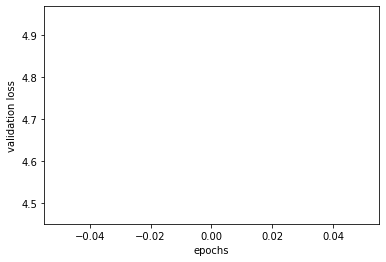

In [ ]:
plt.plot(hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.show()

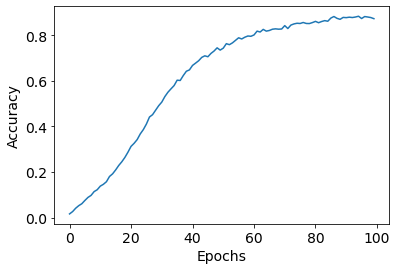

In [ ]:
matplotlib.rcParams.update({'font.size': 14})

plt.plot(hist.history['accuracy'],label="Accuracy")
# plt.plot(hist.history['val_accuracy'], label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.savefig('accuracy.png', dpi=300)


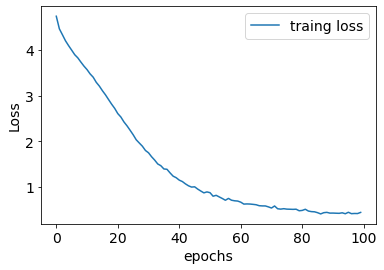

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(hist.history['loss'],label="traing loss")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
plt.savefig('loss.png', dpi=300)